In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

base_path = "Your/Dataset/path" #https://www.kaggle.com/datasets/sriramr/fruits-fresh-and-rotten-for-classification
train_path = base_path + "train"
test_path = base_path + "test"
BATCH_SIZE = 10
EPOCHS = 20

In [4]:
train_ds = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    rescale=1/255.,
    horizontal_flip=True,
    vertical_flip=True
).flow_from_directory(
    directory=train_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenoranges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb'
)

val_ds = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255.
).flow_from_directory(
    directory=test_path,
    target_size=(20, 20),
    classes=['freshapples', 'freshbananas', 'freshoranges', 'rottenapples', 'rottenbananas','rottenoranges'],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 10901 images belonging to 6 classes.
Found 2700 images belonging to 6 classes.


In [5]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation=('relu'), input_shape=(20, 20, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64,(3,3), activation=('relu')))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation=('relu')))
model.add(layers.Dense(128, activation=('relu')))
model.add(layers.Dense(6, activation=('softmax')))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

Epoch 1/20
1091/1091 [==============================] - 49s 45ms/step - loss: 0.6104 - accuracy: 0.7707 - val_loss: 0.3151 - val_accuracy: 0.8948
Epoch 2/20
1091/1091 [==============================] - 49s 45ms/step - loss: 0.3244 - accuracy: 0.8839 - val_loss: 0.2690 - val_accuracy: 0.9067
Epoch 3/20
1091/1091 [==============================] - 50s 45ms/step - loss: 0.2484 - accuracy: 0.9096 - val_loss: 0.3063 - val_accuracy: 0.8841
Epoch 4/20
1091/1091 [==============================] - 47s 43ms/step - loss: 0.2151 - accuracy: 0.9242 - val_loss: 0.1926 - val_accuracy: 0.9337
Epoch 5/20
1091/1091 [==============================] - 48s 44ms/step - loss: 0.1858 - accuracy: 0.9315 - val_loss: 0.1983 - val_accuracy: 0.9304
Epoch 6/20
1091/1091 [==============================] - 48s 44ms/step - loss: 0.1639 - accuracy: 0.9395 - val_loss: 0.2174 - val_accuracy: 0.9200
Epoch 7/20
1091/1091 [==============================] - 49s 45ms/step - loss: 0.1449 - accuracy: 0.9484 - val_loss: 0.1356 -

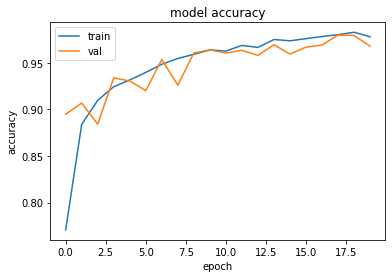

In [10]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

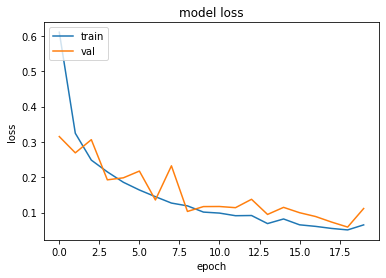

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
import cv2
import numpy as np
img = cv2.imread('rottenApple.png')
img = cv2.resize(img,(20,20))
img = np.reshape(img,[1,20,20,3])

classes = model.predict(img, batch_size=10)
print(classes)
prediction = ''

if classes[0][0]==1:
    prediction = 'Taze Elma'
elif classes[0][1]==1:
    prediction = 'Taze Muz'
elif classes[0][2]==1:
    prediction = 'Taze Portakal'
elif classes[0][3]==1:
    prediction = 'Çürük Elma'
elif classes[0][4]==1:
    prediction = 'Çürük Muz'
elif classes[0][5]==1:
    prediction = 'Çürük Portakal'

print(prediction)

1/1 [==============================] - 0s 22ms/step
[[0. 0. 0. 1. 0. 0.]]
Çürük Elma


C:\Users\ahmet\AppData\Local\Temp\ipykernel_6600\532235350.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(val_ds)


                precision    recall  f1-score   support

     Taze_Elma       0.99      0.97      0.98       397
      Taze_Muz       0.96      0.99      0.98       381
 Taze_Portakal       0.99      0.94      0.96       388
    Çürük_Elma       0.95      0.97      0.96       601
     Çürük_Muz       0.98      1.00      0.99       530
Çürük_Portakal       0.94      0.93      0.93       403

      accuracy                           0.97      2700
     macro avg       0.97      0.97      0.97      2700
  weighted avg       0.97      0.97      0.97      2700



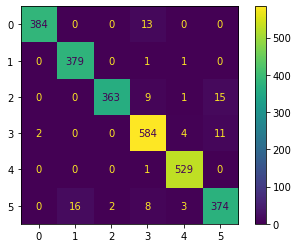

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Y_pred = model.predict_generator(val_ds)
y_pred = np.argmax(Y_pred, axis=1)

target_names = ['Taze_Elma', 'Taze_Muz', 'Taze_Portakal', 'Çürük_Elma', 'Çürük_Muz','Çürük_Portakal']
print(classification_report(val_ds.classes, y_pred, target_names=target_names))

cm = confusion_matrix(val_ds.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_ds.classes)
disp.plot()
plt.show()